# Problem set 2 

## 155 pts

## For problems 1, 2, 4: all functions that you are asked to implement, you have to complete in separate file ```pset2.py```, where we provide signatures of the required functions . Also only this ```py```-file you have to submit in the bot to check correctness of your implementations.

## For problem 3: see instructions in text

## Problem 1 (LU decomposition) 35 pts

### 1. LU for band matrices 

The complexity to find an LU decomposition of a dense $n\times n$ matrix is $\mathcal{O}(n^3)$.
Significant reduction in complexity can be achieved if the matrix has a certain structure, e.g. it is sparse. 
In the following task we consider an important example of $LU$ for a special type of sparse matrices –– band matrices with the bandwidth $m$ equal to 3 or 5 which called tridiagonal and pentadiagonal respectively.

- (5 pts) Write a function ```band_lu(diag_broadcast, n)``` which computes LU decomposition for tridiagonal or pentadiagonal matrix with given diagonal values. 
For example, input parametres ```(diag_broadcast = [1,-2,1], n = 4)``` mean that we need to find LU decomposition for the triangular matrix of the form:

$$A = \begin{pmatrix}
-2 & 1 & 0 & 0\\
1 & -2 & 1 & 0 \\
0 & 1 & -2 & 1 \\
0 & 0 & 1 & -2 \\
\end{pmatrix}.$$

As an output it is considered to make ```L``` and ```U``` - 2D arrays representing diagonals in factors $L$ (```L[0]``` keeps first lower diagonal, ```L[1]``` keeps second lower, ...), and $U$ (```U[:,0]``` keeps main diagonal, ```U[:,1]``` keeps first upper, ...). More details you can find in comments to the corresponding function in ```pset2.py``` 
- (2 pts) Compare execution time of the band LU decomposition using standard function from ```scipy```, i.e. which takes the whole matrix and does not know about its special structure, and band decomposition of yours implementation. Comment on the results.

In [10]:
# Implement function in the ```pset2.py``` file
from pset2 import band_lu
from scipy.sparse import diags # can be used with broadcasting of scalars if desired dimensions are large
import numpy as np
from scipy.linalg import lu

# Your code is here
diag_self = np.array([1, -2, -1])
%timeit band_lu(diag_self, 10000)

diag_embedded = diags([np.ones(9999), -2*np.ones(10000), np.ones(9999)], [-1,0,1]).toarray() 
%timeit lu(diag_embedded)

105 ms ± 4.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
25.8 s ± 514 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


##### Solution to sparse matrix is much faster because it accounts for matrix structure. And embedded function does standart Gaussian elimination.

### 2. Completing the proof of existence of LU 

Some details in lecture proofs about $LU$ were omitted. Let us complete them here.
- (5 pts) Prove that if $LU$ decomposition exists, then matrix is strictly regular.
- (5 pts) Prove that if $A$ is a strictly regular matrix, then $A_1 = D - \frac 1a b c^T$ (see lectures for notations) is also strictly regular.

# My solution is here

- Since non-singularity of triangular matrices is equivalent to the fact that their diagonal elements are not equal to zero. 
$\det A = \det L \det U \ne 0$. To obtain minor $M_{n-1}$ let's multiply first $n-1$ rows of matrix $L$ and first $n-1$ columns of martix $U$. Elements of the last column of matrix $L$  are equal to zero and elements of the last row of matrix $U$ are equal to zero excepted the last elements of row and column respectively. That's why to obtain minor $M_{n-1}$ we can multiply matrices $L_{n-1}$ and  $U_{n-1}$ which are obtained fron $L$ and $U$ by deleting last row and last column. $\det M_{n-1} = \det L_{n-1} \det U_{n-1}\ne 0$, because diagonal elements of $L_{n-1}$ and $U_{n-1}$ are not equal to zero. Let's continue to apply this procedure to $M_{n-2}$ and so further. As a result, determinant of all principle minors is not equal to zero, that's why matrix is strictly regular.

- $$
    A = \begin{pmatrix}
          a & c^{\top} \\
          b & D
    \end{pmatrix},
$$
where $D$ is $(n-1) \times (n-1)$.

$$
     S =\begin{pmatrix}
     1 & 0 \\
     -z & I
     \end{pmatrix}, \:\:\: z = \frac{b}{a}
$$
$$
$$
$$
     A_{new} = \begin{pmatrix}
     a & c^{\top} \\
     0 & A_1
     \end{pmatrix},
$$
$$
 A_1 = D - \frac 1a b c^T
$$
$$
  A_{new} = SA \: \: \det A_{new} = \det S \det A =  \det A = a \det A_1 \ne 0, \:\: a \ne 0 \: because \: A\: -\: strictly\: regular.\: Then\: \det A_1 \ne 0 
$$
 Let's apply the same procedure for matrix $A_1 = \begin{pmatrix}
     a_1 & c^{\top}_1 \\
     0 & A_2
     \end{pmatrix}$, $a_1 \ne 0$ because $A$ is strictly regular. Continue to apply this procedure to $A_2$ and so futher, we obtained that diagonal elements of $A$ and $A_1$ are not equal to zero. And $A_1$ is strictly regular. 


### 3. Stability of LU 

Let
$A = \begin{pmatrix}
\varepsilon & 1 & 0\\
1 & 1 & 1 \\
0 & 1 & 1
\end{pmatrix}.$ 
* (5 pts) Find analytically LU decomposition with and without pivoting for the matrix $A$.
* (3 pts) Explain, why can the LU decomposition fail to approximate factors $L$ and $U$ for $|\varepsilon|\ll 1$ in computer arithmetic?

# Your solution is here
- $A = \begin{pmatrix}
\varepsilon & 1 & 0\\
1 & 1 & 1 \\
0 & 1 & 1
\end{pmatrix}\ = 
\begin{pmatrix}
1 & 0 & 0\\
\frac{1}{\varepsilon} & 1 & 0 \\
0 & \frac{\varepsilon}{\varepsilon-1} & 1
\end{pmatrix}\
\begin{pmatrix}
\varepsilon & 1 & 0\\
0 & 1-\frac{1}{\varepsilon} & 1 \\
0 & 0 & \frac{1}{1-\varepsilon}
\end{pmatrix}$ - $without \: pivoting$
$$
$$
$$
P = \begin{pmatrix}
0 & 1 & 0\\
1 & 0 & 0 \\
0 & 0 & 1
\end{pmatrix}\: - \: permutation\: matrix
$$
$$
A_{perm}= PA = \begin{pmatrix}
1 & 1 & 1\\
\varepsilon & 1 & 0 \\
0 & 1 & 1
\end{pmatrix}\ 
$$
$$
    P\: -\: orthogonal\: and\: simmetric,\: that's\: why\: A=PA_{perm} = 
\begin{pmatrix}
0 & 1 & 0\\
1 & 0 & 0 \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0\\
\varepsilon & 1 & 0 \\
0 & \frac{1}{1-\varepsilon} & 1
\end{pmatrix}
\begin{pmatrix}
1 & 1 & 1\\
0 & 1-\varepsilon & -\varepsilon \\
0 & 0 & \frac{1}{1-\varepsilon}
\end{pmatrix}
$$
- Without pivoting we have to devide by the very small number. Computer can recognize number with finite accuracy, and after the limit 1e-16 it consider number as zero.

### 4. Block LU 

Let $A = \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix}$ be a block matrix. The goal is to solve the linear system

$$
     \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}.
$$

* (2 pts) Using block elimination find matrix $S$ and right-hand side $\hat{f_2}$ so that $u_2$ can be found from $S u_2 = \hat{f_2}$. Note that the matrix $S$ is called <font color='red'> Schur complement </font> of the block $A_{11}$.
* (4 pts) Using Schur complement properties prove that 

$$\det(X+AB) = \det(X)\det(I+BX^{-1}A), $$


where $X$ - nonsingular square matrix.
* (4 pts) Let matrix $F \in \mathbb{R}^{m \times n}$ and $G \in \mathbb{R}^{n \times m}$. Prove that 

$$\det(I_m - FG) = \det(I_n - GF).$$

# My solution is here
- $$\begin{bmatrix} A_{21}A_{11}^{-1}A_{11} & A_{21}A_{11}^{-1}A_{12} \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = 
    \begin{bmatrix} A_{21}A_{11}^{-1}f_1 \\ f_2 \end{bmatrix}
$$ 
$$
$$
$$
 \begin{bmatrix} A_{11} & A_{12} \\ 0 & A_{22} - A_{21}A_{11}^{-1}A_{12} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = 
    \begin{bmatrix} f_1 \\ f_2 - A_{21}A_{11}^{-1}f_1 \end{bmatrix}
$$
$$
$$
$$
    S = A_{22} - A_{21}A_{11}^{-1}A_{12}, \:\: \hat{f_2} = f_2 - A_{21}A_{11}^{-1}f_1
$$ 
 
- $$ 
\det(X+AB) = \det \begin{bmatrix} X & -A \\ B & I \end{bmatrix} = \det(X)\det(I+BX^{-1}A), \:\:\: where \:\:\: I+BX^{-1}A \:\: is \:\: Schur \:\: complement \:\:of \:\: X
$$
- $$
rank(FG) = rank(GF) = k \le \min(rank(F), rank(G))
$$
Matrix $FG$ has the same diagonal value as matrix $GF$, that's why consider them in basises where they have diagonal forms.
$$
 \det(I_m - FG) = \det(S(I_m-FG)S^{-1}) = \det(I_m-\text{diag}(\lambda_1, \dots, \lambda_k)) = \prod^k_{i=1}(1-\lambda_i)
$$
$$
 \det(I_n - GF) = \det(B(I_n-GF)B^{-1}) = \det(I_n-\text{diag}(\lambda_1, \dots, \lambda_k)) = \prod^k_{i=1}(1-\lambda_i)
$$


## Problem 2 (QR decomposition) 30 pts

### 1. Standard Gram-Schmidt algorithm
Our goal is to orthogonalize a system of linearly independent vectors $v_1,\dots,v_n$.
The standard algorithm for this task is the Gram-Schmidt process:

$$
\begin{split}
u_1 &= v_1, \\
u_2 &= v_2 - \frac{(v_2, u_1)}{(u_1, u_1)} u_1, \\
\dots \\
u_n &= v_n - \frac{(v_n, u_1)}{(u_1, u_1)} u_1 - \frac{(v_n, u_2)}{(u_2, u_2)} u_2 - \dots - \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1}.
\end{split}
$$

Obtained $u_1, \dots, u_n$ are orthogonal vectors in exact arithmetics. Then to make the system orthonormal you should divide each of the vectors by its norm: $u_i := u_i/\|u_i\|$.
The Gram-Schmidt process can be considered as a QR decomposition. Let us show that.

* (2 pts) Write out what is matrices $Q$ and $R$ obtained in the process above. 

* (5 pts) Implement in the ```pset2.py``` the described Gram-Schmidt algorithm as a function ```gram_schmidt_qr(A)``` that takes a rectangular matrix ```A``` and outputs ```Q,R```.

* (3 pts) Create a square [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) $V\in\mathbb{R}^{n\times n},\ n = 20$ defined by the vector $x$: ```x = np.linspace(0,1,n)``` (components of $x$ are spaced uniformly between 0 and 1). 
The loss of orthogonality can be described by the following error: $\|Q^{\top}Q-I\|_2$, where $Q^{\top}Q$ is called a Gram matrix. Compute QR decomposition of the created matrix $V$ with function that you have implemented and calculate error $\|Q^{\top}Q-I\|_2$. Comment on the result.

* (5 pts) The observed loss of orthogonality is a problem of this particular algorithm. Luckily, there is [a simple improvement to the algorithm above](https://en.wikipedia.org/wiki/Gram–Schmidt_process#Numerical_stability) that reduces the loss of orthogonality. Implement this modification in the ```pset2.py``` as a function ```modified_gram_schmidt_qr(A)``` such that input and output are similar to ```gram_schmidt_qr(A)```. 
* (3 pts) Compute QR decomposition of the matrix $V$ from the previous task with the function ```modified_gram_schmidt_qr(A)```.
Compute error $\|Q^{\top}Q-I\|_2$. Compare this error to the error obtained with a "pure" Gram-Schmidt and comment on the result.

## First subproblem (2pts)
- $A = [v_1,\dots,v_n]$  $Q = [u_1, \dots, u_n]$  $R = \begin{bmatrix} (v_{1}, u_{1}) & (v_2, u_1) & \dots &  (v_n, u_1)\\
                                                        0 & (v_2, u_2) & (v_3, u_2)& \dots \\
                                                        \dots & \dots & \dots & \dots \\
                                                        \dots & \dots & (v_{n-1}, u_{n-1}) &(v_n, u_{n-1})\\
                                                        0 & \dots & 0 & (v_n, u_n)
                                                        \end{bmatrix}$

In [1]:
import numpy as np

In [2]:
# Implement the functions in the ```pset2.py``` file
from pset2 import gram_schmidt_qr
from pset2 import modified_gram_schmidt_qr

n = 20
x = np.linspace(0, 1, n)
V = np.ones([n,n])
for i in range(1, n):
    V[:, i] = x**i

Q, R = gram_schmidt_qr(V)
print('Standart Gram-Schmidt:',np.linalg.norm(np.dot(Q.transpose(),Q)-np.eye(n), 2))

Q_m, R_m = modified_gram_schmidt_qr(V)
print('Modified Gram-Schmidt:',np.linalg.norm(np.dot(Q_m.transpose(),Q_m)-np.eye(n), 2))
# Your code is here

Standart Gram-Schmidt: 9.982976452872656
Modified Gram-Schmidt: 0.2685531870664454


#### In standart Gram-Schmidt process we fing columns of $Q$ which are orthogonal to columns of $A$. In modified Gram-Schmidt process we find colimns of $Q$ which are orthogonal to previous columns of $Q$, so that this process gives less loss of orthogonality.

### 2. Householder QR (10 pts)

* (7 pts) Implement algorithm for computing QR decomposition based on Householder reflections as a function ```householder_qr(A)``` that takes a rectangular matrix ```A``` and outputs ```Q,R```.


* (2 pts) Apply it to the Vandermonde matrix $V$ created above. Print out the error $\|Q^{\top}Q-I\|_2$, where $Q$ is given by ```householder_qr(A)```. Compare it to the corresponding results of Gram-Schmidt and modified Gram-Schmidt algorithms and comment on it. 



* (3 pts) For values of $n = \{2,25,100,250,500\}$, create a $B\in\mathbb{R}^{n\times n}$ and an upper triangular matrix $R\in\mathbb{R}^{n\times n}$ both filled with standard normal entries. Use ```numpy``` (or ```scipy```) built-in QR decomposition function to obtain a random orthogonal matrix $Q$ from the decomposition of $B$. Then compute $A = QR$ and apply your Gram-Schmidt and Householder algorithms to find the $Q$ and $R$ factors of $A$ – denoted as $\hat{Q}$ and $\hat{R}$. 
Calculate relative errors
$$\frac{\|R-\hat{R}\|_2}{\|R\|_2}, \frac{\|Q-\hat{Q}\|_2}{\|Q\|_2}, \frac{\|A-\hat{Q}\hat{R}\|_2}{\|A\|_2}$$ 
for each value of $n$ and for both algorithms. 
**Note:** scale (multiply corresponding rows/columns by -1) $Q, R,\hat{Q},\hat{R}$ such that diagonal elements of $R$ and $\hat{R}$ be positive.    
    * Comment on the relative errors in $Q$ and $R$ (forward error) compared to ones in $QR$ (backward error).
    * Comment on the backward error obtained for Gram-Schmidt compared to Householder.   

In [3]:
# Implement the function in the pset2.py file
from pset2 import householder_qr

# Your code is here
n = 20
x = np.linspace(0, 1, n)
V = np.ones([n,n])
for i in range(1, n):
    V[:, i] = x**i
Q_h, R_h = householder_qr(V)

print('Householder is :', np.linalg.norm(np.dot(Q_h.T,Q_h)-np.eye(n), 2))

Householder is : 2.5724955796061303e-15


#### The error becomes very small in comparison with Gram-Schmidt, because Q is product of orthogonal matrix if Householder product by defenition. It depends only on coputer precision, when Gram-Schmidt depends on condition number of A. 

In [23]:
N = [2, 25, 100, 250, 500]
R_error = np.zeros(5)
Q_error = np.zeros(5)
A_error = np.zeros(5)
j = 0
for n in N:
    B = np.random.randn(n, n)
    R = np.tril(np.random.randn(n, n)).T
    for i in range(n):
        if R[i, i] < 0:
            R[i, i] = -R[i, i]
    Q, r = np.linalg.qr(B)
    A = np.dot(Q,R)
    Q_new, R_new = householder_qr(A)
    for i in range(n):
        if R_new[i, i] < 0:
            R_new[i, :] = -R_new[i,:]
            Q_new[:, i] = -Q_new[:, i]
    R_error[j] = np.linalg.norm(R-R_new, 2)/np.linalg.norm(R, 2)
    Q_error[j] = np.linalg.norm(Q-Q_new, 2)/np.linalg.norm(Q, 2)
    A_error[j] = np.linalg.norm(A-np.dot(Q_new, R_new), 2)/np.linalg.norm(A, 2)
    j+=1

In [25]:
print('R - relative error:', R_error, '\n')
print('Q - relative error:', Q_error, '\n')
print('A - relative error:', A_error, '\n')

R - relative error: [1.59602140e-16 1.13571209e-12 7.68953240e-01 1.21548458e+00
 1.34979444e+00] 

Q - relative error: [0.00000000e+00 1.14573318e-11 1.97292346e+00 1.99981043e+00
 2.00000000e+00] 

A - relative error: [1.59602140e-16 9.01636471e-16 2.77618214e-15 6.58699977e-15
 1.08578229e-14] 



#### The forward error is growing, but backward error increases not so rapidly, because algorithm can be slightly different that results in big relative forward error in large scale problem.

## Problem 3 (Word2Vec as Matrix Factorization) 45 pts

In this assignment you are supposed to apply SVD to training your own [word embedding model](https://en.wikipedia.org/wiki/Word_embedding) which maps English words to vectors of real numbers.

Skip-Gram Negative Sampling (SGNS) word embedding model, commonly known as **word2vec** ([Mikolov et al., 2013](http://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)), is usually optimized by stochastic gradient descent. However, the optimization of SGNS objective can be viewed as implicit matrix factorization objective as was shown in ([Levy and Goldberg, 2015](http://papers.nips.cc/paper/5477-neural-word-embedding-as-implicit-matrix-factorization.pdf)).

###### 1. Notation
Assume we have a text corpus given as a sequence of words $\{w_1,w_2,\dots,w_n\}$ where $n$ may be larger than $10^{12}$ and $w_i \in \mathcal{V}$ belongs to a vocabulary of words $\mathcal{V}$. A word $c \in \mathcal{V}$ is called *a context* of word $w_i$ if they are found together in the text. More formally, given some measure $L$ of closeness between two words (typical choice is $L=2$), a word $c \in \mathcal{V}$ is called a context if $c \in \{w_{i-L}, \dots, w_{i-1}, w_{i+1}, \dots, w_{i+L} \}$ Let $\mathbf{w},\mathbf{c}\in\mathbb{R}^d$ be the *word embeddings* of word $w$ and context $c$, respectively. Assume they are specified by the mapping  $\Phi:\mathcal{V}\rightarrow\mathbb{R}^d$, so $\mathbf{w}=\Phi(w)$. The ultimate goal of SGNS word embedding model is to fit a good mapping $\Phi$.

Let $\mathcal{D}$ be a multiset of all word-contexts pairs observed in the corpus. In the SGNS model, the probability that word-context pair $(w,c)$ is observed in the corpus is modeled as the following distribution:

$$
P(\#(w,c)\neq 0|w,c) = \sigma(\mathbf{w}^\top \mathbf{c}) = \frac{1}{1 + \exp(-\mathbf{w}^\top \mathbf{c})},
$$

where $\#(w,c)$ is the number of times the pair $(w,c)$ appears in $\mathcal{D}$ and $\mathbf{w}^\top\mathbf{c}$ is the scalar product of vectors $\mathbf{w}$ and $\mathbf{c}$. Two important quantities which we will also use further are the number of times the word $w$ and the context $c$ appear in $\mathcal{D}$, which can be computed as

$$
\#(w) = \sum_{c\in\mathcal{V}} \#(w,c), \quad \#(c) = \sum_{w\in\mathcal{V}} \#(w,c).
$$


###### 2. Optimization objective

Vanilla word embedding models are trained by maximizing log-likelihood of observed word-context pairs, namely

$$
\mathcal{L} = \sum_{w \in \mathcal{V}} \sum_{c \in \mathcal{V}} \#(w,c) \log \sigma(\mathbf{w}^\top\mathbf{c}) \rightarrow \max_{\mathbf{w},\mathbf{c} \in \mathbb{R}^d}.
$$

Skip-Gram Negative Sampling approach modifies the objective by additionally minimizing the log-likelihood of random word-context pairs, so called *negative samples*. This idea incorporates some useful linguistic information that some number ($k$, usually $k=5$) of word-context pairs *are not* found together in the corpus which usually results in word embeddings of higher quality. The resulting optimization problem is

$$
\mathcal{L} = \sum_{w \in \mathcal{V}} \sum_{c \in \mathcal{V}} \left( \#(w,c) \log \sigma(\mathbf{w}^\top\mathbf{c}) + k \cdot \mathbb{E}_{c'\sim P_\mathcal{D}} \log \sigma (-\mathbf{w}^\top\mathbf{c}) \right) \rightarrow \max_{\mathbf{w},\mathbf{c} \in \mathbb{R}^d},
$$

where $P_\mathcal{D}(c)=\frac{\#(c)}{|\mathcal{D}|}$ is a probability distribution over word contexts from which negative samples are drawn.

[Levy and Goldberg, 2015](http://papers.nips.cc/paper/5477-neural-word-embedding-as-implicit-matrix-factorization.pdf) showed that this objective can be equivalently written as

$$
\mathcal{L} = \sum_{w \in \mathcal{V}} \sum_{c \in \mathcal{V}} f(w,c) = \sum_{w \in \mathcal{V}} \sum_{c \in \mathcal{V}} \left( \#(w,c) \log \sigma(\mathbf{w}^\top\mathbf{c}) + \frac{k\cdot\#(w)\cdot\#(c)}{|\mathcal{D}|} \log \sigma (-\mathbf{w}^\top\mathbf{c}) \right) \rightarrow \max_{\mathbf{w},\mathbf{c} \in \mathbb{R}^d},
$$

A crucial observation is that this loss function depends only on the scalar product $\mathbf{w}^\top\mathbf{c}$ but not on embedding $\mathbf{w}$ and $\mathbf{c}$ separately.

###### 3. Matrix factorization problem statement

Let $|\mathcal{V}|=m$, $W \in \mathbb{R}^{m\times d}$ and $C \in \mathbb{R}^{m\times d}$ be matrices, where each row $\mathbf{w}\in\mathbb{R}^d$ of matrix $W$ is the word embedding of the corresponding word $w$ and each row $\mathbf{c}\in\mathbb{R}^d$ of matrix $C$ is the context embedding of the corresponding context $c$. SGNS embeds both words and their contexts into a low-dimensional space $\mathbb{R}^d$, resulting in the word and context matrices $W$ and $C$. The rows of matrix $W$ are typically used in NLP tasks (such as computing word similarities) while $C$ is ignored. It is nonetheless instructive to consider the product $W^\top C = M$. Viewed this way, SGNS can be described as factorizing an implicit matrix $M$ of dimensions $m \times m$ into two smaller matrices.

Which matrix is being factorized? A matrix entry $M_{wc}$ corresponds to the dot product $\mathbf{w}^\top\mathbf{c}$ . Thus, SGNS is factorizing a matrix in which each row corresponds to a word $w \in \mathcal{V}$ , each column corresponds to a context $c \in \mathcal{V}$, and each cell contains a quantity $f(w,c)$ reflecting the strength of association between that particular word-context pair. Such word-context association matrices are very common in the NLP and word-similarity literature. That said, the objective of SGNS does not explicitly state what this association metric is. What can we say about the association function $f(w,c)$? In other words, which matrix is SGNS factorizing? Below you will find the answers.

### Task 1 (theoretical) 5 pts

Solve SGNS optimization problem with respect to the $\mathbf{w}^\top\mathbf{c}$ and show that the matrix being factorized is

$$
M_{wc} = \mathbf{w}^\top\mathbf{c} = \log \left( \frac{\#(w,c) \cdot |\mathcal{D}|}{k\cdot\#(w)\cdot\#(c)} \right)
$$

**Hint:** Denote $x=\mathbf{w}^\top\mathbf{c}$, rewrite SGNG optimization problem in terms of $x$ and solve it.

**Note:** This matrix is called Shifted Pointwise Mutual Information (SPMI) matrix, as its elements can be written as

$$
\text{SPMI}(w,c) = M_{wc} = \mathbf{w}^\top\mathbf{c} = \text{PMI}(w,c) - \log k
$$

and $\text{PMI}(w,c) = \log \left( \frac{\#(w,c) \cdot |\mathcal{D}|}{\#(w)\cdot\#(c)} \right)$ is the well-known [pointwise mutual information](https://en.wikipedia.org/wiki/Pointwise_mutual_information) of $(w,c)$.

## My proof is here
$$
\mathcal{L} = \sum_{w \in \mathcal{V}} \sum_{c \in \mathcal{V}} f(w,c) = \sum_{w \in \mathcal{V}} \sum_{c \in \mathcal{V}} \left( \#(w,c) \log \sigma(\mathbf{w}^\top\mathbf{c}) + \frac{k\cdot\#(w)\cdot\#(c)}{|\mathcal{D}|} \log \sigma (-\mathbf{w}^\top\mathbf{c}) \right) \rightarrow \max_{\mathbf{w},\mathbf{c} \in \mathbb{R}^d}
$$
$$
\mathbf{w}^\top\mathbf{c} = x
$$
$$
\mathcal{L} = \sum_{w \in \mathcal{V}} \sum_{c \in \mathcal{V}} f(w,c) = \sum_{w \in \mathcal{V}} \sum_{c \in \mathcal{V}} \left( \#(w,c) \log \sigma(x) + \frac{k\cdot\#(w)\cdot\#(c)}{|\mathcal{D}|} \log \sigma (-x) \right) \rightarrow \max_{\mathbf{w},\mathbf{c} \in \mathbb{R}^d}
$$
$$
\frac{\partial \mathcal{L}}{\partial x} = 0
$$
$$
\frac{\partial \mathcal{L}}{\partial x} =  \#(w,c) \frac{\frac{\partial\sigma(x)}{\partial x}}{\sigma(x)} + \frac{k\cdot\#(w)\cdot\#(c)}{|\mathcal{D}|} \frac{\frac{\partial \sigma (-x)}{\sigma(x)}}{ \sigma (-x) }
$$
$$
\frac{\partial\sigma(x)}{\partial x} = \frac{\exp(-x)}{(1+\exp(-x))^2} \: \, \:\frac{\partial\sigma(-x)}{\partial x} = -\frac{\exp(x)}{(1+\exp(x))^2}
$$
$$
\frac{\partial \mathcal{L}}{\partial x} =  \#(w,c) \frac{1}{\exp(x)+1} - \frac{k\cdot\#(w)\cdot\#(c)}{|\mathcal{D}|} \frac{\exp(x)}{ \exp(x) + 1} = 0
$$
$$
\exp(x) = \frac{\#(w,c)|\mathcal{D}|}{k\cdot\#(w)\cdot\#(c)}
$$
$$
\mathbf{w}^\top\mathbf{c} = \log\left(\frac{\#(w,c)|\mathcal{D}|}{k\cdot\#(w)\cdot\#(c)}\right)
$$

### Task 2 (practical) 40 pts

In [21]:
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from matplotlib import pyplot as plt
%matplotlib inline

1. Download dataset [enwik8](http://mattmahoney.net/dc/enwik8.zip) of compressed Wikipedia articles and preprocess raw data with Perl script **main_.pl**. This script will clean all unnecessary symbols, make all words to lowercase, and produce only sentences with words.
```
wget http://mattmahoney.net/dc/enwik8.zip
unzip enwik8.zip
mkdir data
perl main_.pl enwik8 > data/enwik8.txt
```

In [2]:
# Load enwik 8

import re
file = open("data/enwik8.txt", "r")
doclist = [line for line in file]
docstr = ''.join(doclist)
sentences = re.split(r'[.!?]', docstr)
sentences = [sentence.split() for sentence in sentences if len(sentence) > 1]

In [28]:
print (sentences[1249])

['achilles', 'wrath', 'is', 'terrible', 'and', 'he', 'slays', 'many', 'trojan', 'warriors', 'and', 'allies', 'including', 'priam', 's', 'son', 'lycaon', 'whom', 'achilles', 'had', 'previously', 'captured', 'and', 'sold', 'into', 'slavery', 'but', 'who', 'had', 'been', 'returned', 'to', 'troy']


2. Construct the word vocabulary from the obtained sentences which enumerates words which occur more than $r=200$ times in the corpus.

In [34]:
def create_vocabulary(sentences, r=200):
    vocabulary = {}
    temp_vocab = {}
    # Your code is here
    for sentence in sentences:
        for word in sentence:
            if (word in temp_vocab):
                temp_vocab[word] += 1
            else:
                temp_vocab[word] = 1
    for word in temp_vocab.keys():
        if (temp_vocab[word]>=r):
            vocabulary[word] = temp_vocab[word]
    return vocabulary

In [35]:
vocab = create_vocabulary(sentences)

3. Scan the text corpus with sliding window of size $5$ and step $1$ (which corresponds to $L$=2) and construct co-occurrence word-context matrix $D$ with elements $D_{wc}=\#(w,c)$. Please, ignore words which occur less than $r=200$ times, but include them into the sliding window. Please, see the graphical illustration of the procedure described.

![Sliding window](sliding_window.png)

In [37]:
def create_corpus_matrix(sentences, vocabulary):
    # Your code is here
    
    words = vocabulary.keys()
    corpus_matrix = np.zeros((len(words), len(words)))
    word_numbers = {}
    i = 0
    for word in words:
        word_numbers[word] = i
        i+=1
    for sentence in sentences:
        length = len(sentence)
        position = 0
        for word in sentence:
            if (word in words):
                L1, L2 = window_size(position, length-1)
                for context in sentence[position-L1: position]:
                    if (context in words): 
                        corpus_matrix[word_numbers[word], word_numbers[context]] +=1
                        
                for context in sentence[position+1: position+L2+1]:
                    if (context in words): 
                        corpus_matrix[word_numbers[word], word_numbers[context]] +=1
            position += 1
    return corpus_matrix

def window_size(current_pos, max_pos):
    if current_pos>=2:
        L1 = 2
    else:
        L1 = current_pos
    if (max_pos - current_pos >= 2):
        L2 = 2
    else:
        L2 = max_pos - current_pos
    return L1, L2

In [38]:
D = create_corpus_matrix(sentences, vocab)

4. To find good word embeddings, [Levy and Goldberg, 2015](http://papers.nips.cc/paper/5477-neural-word-embedding-as-implicit-matrix-factorization.pdf) proposed to find rank-$d$ SVD of Shifted Positive Pointwise Mutual Information (SPPMI) matrix

$$
U \Sigma V^\top \approx \text{SPPMI},
$$

where $\text{SPPMI}(w, c) = \max\left(\text{SPMI}(w, c), 0 \right)$ and $\text{SPMI}(w, c)$ is the element of the matrix $\text{SPPMI}$ at position $(w, c)$.
Then use $W=U\sqrt{\Sigma}$ as word embedding matrix. Your task is to reproduce their results. Write function constructs $\text{SPPMI}$ matrix, computes its SVD and produces word-vectors matrix $W$. Pay attention that $\text{SPPMI}$ matrix is **sparse**!  

In [39]:
from scipy.sparse import csc_matrix

In [40]:
def compute_embeddings(D, k, d=200):
    # Your code is here
    embedding_matrix = np.zeros((D.shape[0], d))
    SPPMI = np.zeros((D.shape))
    w = np.zeros((D.shape[0], 1))
    c = np.zeros((1, D.shape[1]))
    w = np.sum(D, axis = 1)
    w = w.reshape(D.shape[0], 1)
    c = np.sum(D, axis = 0)
    c = c.reshape(1, D.shape[1])
    size_D = np.sum(D)
    SPPMI = np.maximum(np.log(size_D*D)-np.log(np.dot(w, c)*k), 0)
    SPPMI = csc_matrix(SPPMI)
    u, s, v = svds(SPPMI, d, return_singular_vectors = 'u')
    embedding_matrix = np.dot(u, np.diag(np.sqrt(s))) 
    return embedding_matrix

In [41]:
k = 5 # negative sampling parameter
W = compute_embeddings(D, k)

C:\Users\Mac_Laren\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


5. Write class **WordVectors** using provided template.

In [76]:
class WordVectors:
    
    def __init__(self, vocabulary, embedding_matrix):
        self.vocab = vocabulary
        self.W = embedding_matrix
        self.inv_vocab = {v: k for k, v in self.vocab.items()}
        
    def word_vector(self, word):
        """ 
        Takes word and returns its word vector.
        """
#         Your code is here
        i=0
        word_number = {}
        for word_ in self.vocab.keys():
            word_number[word_] = i
            i+=1
        word_vector = self.W[word_number[word], :]
        word_vector = word_vector.reshape(1, len(word_vector))
        return word_vector
    
    def nearest_words(self, word, top_n=10):
        """ 
        Takes word from the vocabulary and returns its top_n
        nearest neighbors in terms of cosine similarity.
        """
#       Your code is here
        inv_voc = []
        neighbors = []
        cos_matrix = cosine_similarity(self.W, WordVectors.word_vector(self, word))
        for word_ in self.vocab.keys():
            inv_voc.append(word_)
        for i in range (11):
            top = np.argmax(cos_matrix)
            if i != 0:
                neighbors.append((inv_voc[int(top)], round(float(cos_matrix[int(top)]),3)))
            cos_matrix[int(top)] = 0
        return neighbors

In [79]:
model = WordVectors(vocab, W)#It was in notebook before my solution

In [80]:
my_model = WordVectors(vocab, W)

In [13]:
model.nearest_words("anarchism")#It was in notebook before my solution

[('communism', 0.792),
 ('anarcho', 0.787),
 ('capitalism', 0.784),
 ('socialism', 0.752),
 ('liberalism', 0.727),
 ('criticisms', 0.705),
 ('capitalist', 0.662),
 ('fascism', 0.565),
 ('anarchist', 0.527),
 ('marxist', 0.518)]

In [84]:
neigh_1 = my_model.nearest_words("anarchism")
for x in neigh_1:
    print(x)

('communism', 0.792)
('anarcho', 0.787)
('capitalism', 0.784)
('socialism', 0.752)
('liberalism', 0.727)
('criticisms', 0.705)
('capitalist', 0.662)
('fascism', 0.565)
('anarchist', 0.527)
('marxist', 0.518)


In [14]:
model.nearest_words("ussr")#It was in notebook before my solution

[('ukraine', 0.671),
 ('russia', 0.629),
 ('poland', 0.55),
 ('belarus', 0.538),
 ('yugoslavia', 0.538),
 ('romania', 0.517),
 ('serbia', 0.507),
 ('austria', 0.5),
 ('hungary', 0.466),
 ('bulgaria', 0.43)]

In [74]:
neigh_2 = my_model.nearest_words("ussr")
for x in neigh_2:
    print(x)

('ukraine', 0.671)
('russia', 0.629)
('poland', 0.55)
('belarus', 0.538)
('yugoslavia', 0.538)
('romania', 0.517)
('serbia', 0.507)
('austria', 0.5)
('hungary', 0.466)
('bulgaria', 0.43)


In [15]:
model.nearest_words("rap")#It was in notebook before my solution

[('hop', 0.828),
 ('hip', 0.817),
 ('funk', 0.758),
 ('rock', 0.737),
 ('punk', 0.706),
 ('music', 0.676),
 ('pop', 0.666),
 ('scene', 0.659),
 ('band', 0.657),
 ('jazz', 0.625)]

In [82]:
neigh_3 = my_model.nearest_words("rap")
for x in neigh_3:
    print(x)

('hop', 0.828)
('hip', 0.817)
('funk', 0.758)
('rock', 0.737)
('punk', 0.706)
('music', 0.676)
('pop', 0.666)
('scene', 0.659)
('band', 0.657)
('jazz', 0.625)


6. Calculate top 10 nearest neighbours with the corresponding cosine similarities for the words {numerical, linear, algebra} and insert them in the correspoding functions in ```pset2.py```.

In [85]:
numerical = my_model.nearest_words("numerical")
linear = my_model.nearest_words("linear")
algebra = my_model.nearest_words("algebra")

In [86]:
print(numerical)

[('computation', 0.547), ('mathematical', 0.532), ('calculations', 0.499), ('polynomial', 0.485), ('calculation', 0.473), ('practical', 0.46), ('statistical', 0.456), ('symbolic', 0.455), ('geometric', 0.441), ('simplest', 0.438)]


In [87]:
print(linear)

[('differential', 0.759), ('equations', 0.724), ('equation', 0.682), ('continuous', 0.674), ('multiplication', 0.674), ('integral', 0.672), ('algebraic', 0.667), ('vector', 0.654), ('algebra', 0.63), ('inverse', 0.622)]


In [88]:
print(algebra)

[('geometry', 0.795), ('calculus', 0.73), ('algebraic', 0.716), ('differential', 0.687), ('equations', 0.665), ('equation', 0.648), ('theorem', 0.647), ('topology', 0.634), ('linear', 0.63), ('integral', 0.618)]


# Problem 4 (eigenvalues)  45 pts

### 1. Theoretical tasks

* (5 pts) Prove that normal matrix is Hermitian iff its eigenvalues are real. Prove that normal matrix is unitary iff its eigenvalues satisfy $|\lambda| = 1$. 

* (5 pts) The following problem illustrates instability of the Jordan form. Find theoretically the eigenvalues of the perturbed Jordan block:

$$
    J(\lambda) = 
    \begin{bmatrix} 
     \lambda & 1 & & & 0 \\ 
     & \lambda & 1 & & \\ 
     &  & \ddots & \ddots & \\ 
     & & & \lambda & 1 \\ 
     \varepsilon & & & & \lambda  \\ 
    \end{bmatrix}_{n\times n}
$$

Comment how eigenvalues of $J(0)$ are perturbed for large $n$.

### Theoretical problems
- Let x - eigenvector of H - Hermitian matrix
$$
    (Hx, x) = \lambda^*(x,x) = (x, Hx) = \lambda(x,x),\:\:\: if \:\: \lambda^*=\lambda, \:\: then \: \:\lambda\:-\:real
$$
    All normal matrices are diagonalizable. $\lambda_1, \dots, \lambda_n$ are real. $H = Udiag(\lambda_1, \dots, \lambda_n)U^*$, $H^* = Udiag(\lambda_1^*, \dots, \lambda_n^*)U^*$, all $\lambda$ are real, so $H = H^*$ 
$$
$$
Let x - eigenvector of $U$ - unitary matrix, $(Ux,Ux) = |\lambda|^2(x,x) = (x, x)$, then $|\lambda|=1$
$$
$$
Let $|\lambda|=1$ - eigenvalues of $B$, $B$ - normal matrix,  $B = Udiag(\lambda_1, \dots, \lambda_n)U^*$, $BB^* = Udiag(\lambda_1\lambda_1^*, \dots, \lambda_n\lambda_n^*)U^* = UIU^* = I$, then $B$ is unitary.

-
$$ 
    det(J(\varepsilon)-\mu I) = (\lambda-\mu)^n + (-1)^{n+1}\varepsilon = 0
$$
$$
    (\lambda-\mu)^n=(-1)^{n}\varepsilon
$$
$$
    \mu = \lambda-\sqrt[n]{(-1)^{n}\varepsilon}
$$
For large $n$ eigenvalues of $J(0)$ will be near the 1 or -1 that depends on $n$ is even or odd, because if $n$ is large then root in power $n$ will be near to 1.

### 2. PageRank


#### Damping factor importance

* (5 pts) Write the function ```pagerank_matrix(G)``` that takes an adjacency matrix $G$ (in both sparse and dense formats) as an input and outputs the corresponding PageRank matrix $A$.

* (3 pts) Find PageRank matrix $A$ that corresponds to the following graph: <img src="graph.png" width='250'>
What is its largest eigenvalue? What multiplicity does it have?


* (5 pts) Implement the power method for a given matrix $A$, an initial guess $x_0$ and a number of iterations ```num_iter```. It should be organized as a function ```power_method(A, x0, num_iter)``` that outputs approximation to eigenvector $x$, eigenvalue $\lambda$ and history of residuals $\{\|Ax_k - \lambda_k x_k\|_2\}$. Make sure that the method conveges to the correct solution on a matrix $\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}$ which is known to have the largest eigenvalue equal to $3$.


* (2 pts) Run the power method for the graph presented above and plot residuals $\|Ax_k - \lambda_k x_k\|_2$ as a function of $k$ for ```num_iter=100``` and random initial guess ```x0```.  Explain the absence of convergence. 


* (2 pts) Consider the same graph, but with a directed edge that goes from the node 3 to the node 4 being removed. Plot residuals as in the previous task and discuss the convergence. Now, run the power method with ```num_iter=100``` for 10 different initial guesses and print/plot the resulting approximated eigenvectors. Why do they depend on the initial guess?


In order to avoid this problem Larry Page and Sergey Brin [proposed](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf) to use the following regularization technique:

$$
A_d = dA + \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix},
$$

where $d$ is a small parameter in $[0,1]$ (typically $d=0.85$), which is called **damping factor**, $A$ is of size $N\times N$. Now $A_d$ is the matrix with multiplicity of the largest eigenvalue equal to 1. 
Recall that computing the eigenvector of the PageRank matrix, which corresponds to the largest eigenvalue, has the following interpretation. Consider a person who stays in a random node of a graph (i.e. opens a random web page); at each step s/he follows one of the outcoming edges uniformly at random (i.e. opens one of the links). So the person randomly walks through the graph and the eigenvector we are looking for is exactly his/her stationary distribution â€” for each node it tells you the probability of visiting this particular node. Therefore, if the person has started from a part of the graph which is not connected with the other part, he will never get there.  In the regularized model, the person at each step follows one of the outcoming links with probability $d$ OR teleports to a random node from the whole graph with probability $(1-d)$.

* (2 pts) Now, run the power method with $A_d$ and plot residuals $\|A_d x_k - \lambda_k x_k\|_2$ as a function of $k$ for $d=0.97$, ```num_iter=100``` and a random initial guess ```x0```.

* (5 pts) Find the second largest in the absolute value eigenvalue of the obtained matrix $A_d$. How and why is it connected to the damping factor $d$? What is the convergence rate of the PageRank algorithm when using damping factor?

Usually, graphs that arise in various areas are sparse (social, web, road networks, etc.) and, thus, computation of a matrix-vector product for corresponding PageRank matrix $A$ is much cheaper than $\mathcal{O}(N^2)$. However, if $A_d$ is calculated directly, it becomes dense and, therefore, $\mathcal{O}(N^2)$ cost grows prohibitively large for  big $N$.


* (2 pts) Implement fast matrix-vector product for $A_d$ as a function ```pagerank_matvec(A, d, x)```, which takes a PageRank matrix $A$ (in sparse format, e.g., ```csr_matrix```), damping factor $d$ and a vector $x$ as an input and returns $A_dx$ as an output. 

* (1 pts) Generate a random adjacency matrix of size $10000 \times 10000$ with only 100 non-zero elements and compare ```pagerank_matvec``` performance with direct evaluation of $A_dx$.

In [129]:
import numpy as np
from scipy.sparse import csr_matrix, diags
from random import randint

In [130]:
# implement the functions in the pset2.py file
from pset2 import pagerank_matrix, power_method, pagerank_matvec

# Your code is here

In [131]:
G = np.zeros((5,5))
G[0, 1] = 1
G[1, 2] = 1
G[2, 1] = 1
G[2, 0] = 1
G[3, 4] = 1
G[4, 3] = 1
A = pagerank_matrix(csr_matrix(G))
A = A.toarray()
print('PageRank Matrix:\n', A)

PageRank Matrix:
 [[0.  0.  0.5 0.  0. ]
 [1.  0.  0.5 0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  1. ]
 [0.  0.  0.  1.  0. ]]


In [132]:
w, v = np.linalg.eig(A)
print(w)
print('Largest eigenvalue:', round(max(np.abs(w)),2), ', Multiplicity is 2')

[-0.5+0.5j -0.5-0.5j  1. +0.j   1. +0.j  -1. +0.j ]
Largest eigenvalue: 1.0 , Multiplicity is 2


In [133]:
#Checking of power_method
Checking = np.array([[2, -1], [-1, 2]])
x0 = np.array([100, -5]).T
x, l, res = power_method(Checking, x0, 10)
print(l)

2.999999999530459


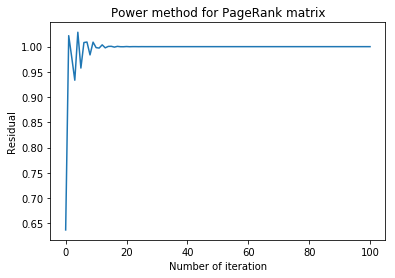

In [137]:
#power_method for graph
x0 = np.random.randn(5, 1)
x_g, l_g, res_g = power_method(A, x0, 100)
plt.plot(range(101), res_g)
plt.xlabel('Number of iteration')
plt.ylabel('Residual')
plt.title('Power method for PageRank matrix');

#### Power method doesn't converge because of the multiplicity of the largest eigenvalue

C:\Users\Mac_Laren\Desktop\NLA\psets\pset2.py:130: RuntimeWarning: divide by zero encountered in true_divide
  L = np.array(1./G.sum(axis=1))


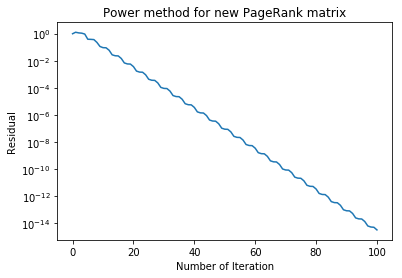

In [138]:
#remove (3, 4) node
G_new = G
G_new[3, 4] = 0
A_new = pagerank_matrix(G_new)
x_new, l_new, res_new = power_method(A_new, x0, 100)
plt.semilogy(range(101), res_new/res_new[0])
plt.xlabel('Number of Iteration')
plt.ylabel('Residual')
plt.title('Power method for new PageRank matrix');

In [9]:
w_new, v_new = np.linalg.eig(A_new.toarray())
print(w_new)

[-0.5+0.5j -0.5-0.5j  1. +0.j   0. +0.j   0. +0.j ]


#### The largest eigenvalue has multiplicity 1, and power method converges

In [10]:
#intial vector
for i in range(1, 11):
    X0 = np.random.randn(5, 1)
    X, L, RES =  power_method(A, X0, 100)
    print('Eigenvector', i, ':\n', X, '\n')

Eigenvector 1 :
 [[-0.03868726]
 [-0.07737452]
 [-0.07737452]
 [ 0.93076297]
 [-0.34671307]] 

Eigenvector 2 :
 [[-0.15973785]
 [-0.3194757 ]
 [-0.3194757 ]
 [-0.73366917]
 [ 0.48175089]] 

Eigenvector 3 :
 [[-0.16841765]
 [-0.33683529]
 [-0.33683529]
 [ 0.26524267]
 [ 0.82119778]] 

Eigenvector 4 :
 [[0.08444918]
 [0.16889835]
 [0.16889835]
 [0.91100922]
 [0.32538783]] 

Eigenvector 5 :
 [[0.04690127]
 [0.09380254]
 [0.09380254]
 [0.29297359]
 [0.9457108 ]] 

Eigenvector 6 :
 [[-0.09044633]
 [-0.18089266]
 [-0.18089266]
 [-0.94760512]
 [ 0.16858138]] 

Eigenvector 7 :
 [[ 0.32842773]
 [ 0.65685547]
 [ 0.65685547]
 [-0.17090177]
 [-0.00309901]] 

Eigenvector 8 :
 [[ 0.02816072]
 [ 0.05632144]
 [ 0.05632144]
 [-0.99574131]
 [ 0.03690552]] 

Eigenvector 9 :
 [[-0.18271382]
 [-0.36542763]
 [-0.36542763]
 [ 0.76336526]
 [ 0.34178126]] 

Eigenvector 10 :
 [[0.31014424]
 [0.62028848]
 [0.62028848]
 [0.08938447]
 [0.35539467]] 



#### Power method depends on intial guess because two different eigenvectors can correspond to the similar eigenvalue that has multiplicity 2 

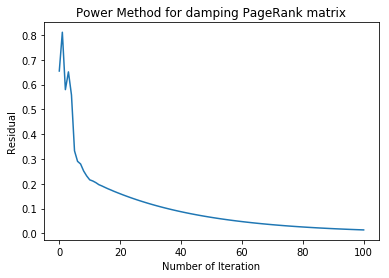

In [14]:
d = 0.97
A_d = d*A+(1-d)*np.ones(A.shape)/A.shape[0]
x0_d = np.random.randn(A_d.shape[1],1)
x_d, l_d, res_d = power_method(A_d, x0_d, 100)
plt.plot(range(101), res_d)
plt.xlabel('Number of Iteration')
plt.ylabel('Residual')
plt.title('Power Method for damping PageRank matrix');

In [13]:
#second eigenvalue of A_d

In [29]:
y = np.random.randn(5, 1)
y = y/np.dot(x_d.T.conj(), y)
B_d = A_d - l_d*np.dot(x_d, y.T)
x_d2, l_d2, res_d2 = power_method(B_d, x_d, 100)
print(l_d2)

[[-0.97596773]]


#### The absolute value of second lagrest eigenvalue equal to d
$ \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix}$ has rank equal to 1, so that the largest eigenvalue is equal d+\frac{1-d}{N}, and the second to d
The power method for matrix $B = A_d-\lambda_1x_1y^T$, so that $y^Tx_1 = 1$ helps to find the second largest eigenvalue of $A_d$, where $x_1$ is eigenvector corresponded to largest eigenvalue.

In [4]:
N = 10000
d = 0.97
ls_matrix = np.zeros((N, N))
for i in range(100):
    ls_matrix[randint(0, N-1), randint(0,N-1)] = 1

In [5]:
%timeit (d*ls_matrix+(1-d)*np.ones(ls_matrix.shape)/A.shape[0])@np.random.randn(N, 1)
ls_matrix = csr_matrix(ls_matrix)
%timeit pagerank_matvec(ls_matrix, 0.97, np.random.randn(N, 1))

3.11 s ± 69.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
490 µs ± 2.47 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### DBLP: computer science bibliography

Download the dataset from [here](https://goo.gl/oZVxEa), unzip it and put `dblp_authors.npz`  and `dblp_graph.npz` in the same folder with this notebook. Each value (author name) from `dblp_authors.npz` corresponds to the row/column of the matrix from `dblp_graph.npz`. Value at row `i` and column `j` of the matrix from `dblp_graph.npz` corresponds to the number of times author `i` cited papers of the author `j`. Let us now find the most significant scientists according to PageRank model over DBLP data.

* (4 pts) Load the weighted adjacency matrix and the authors list into Python using ```load_dblp(...)``` function. Print its density (fraction of nonzero elements). Find top-10 most cited authors from the weighted adjacency matrix. Now, make all the weights of the adjacency matrix equal to 1 for simplicity (consider only existence of connection between authors, not its weight). Obtain the PageRank matrix $A$ from the adjacency matrix and verify that it is stochastic.
 
 
* (1 pts) In order to provide ```pagerank_matvec``` to your ```power_method``` (without rewriting it) for fast calculation of $A_dx$, you can create a ```LinearOperator```: 
```python
L = scipy.sparse.linalg.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))
```
Calling ```L@x``` or ```L.dot(x)``` will result in calculation of ```pagerank_matvec(A, d, x)``` and, thus, you can plug $L$ instead of the matrix $A$ in the ```power_method``` directly. **Note:** though in the previous subtask graph was very small (so you could disparage fast matvec implementation), here it is very large (but sparse), so that direct evaluation of $A_dx$ will require $\sim 10^{12}$ matrix elements to store - good luck with that (^_<).


* (2 pts) Run the power method starting from the vector of all ones and plot residuals $\|A_dx_k - \lambda_k x_k\|_2$  as a function of $k$ for $d=0.85$.


* (1 pts) Print names of the top-10 authors according to PageRank over DBLP when $d=0.85$. Comment on your findings.

In [139]:
from scipy.sparse import load_npz
import numpy as np
def load_dblp(path_auth, path_graph):
    G = load_npz(path_graph).astype(float)
    with np.load(path_auth) as data: authors = data['authors']
    return G, authors
G, authors = load_dblp('dblp_authors.npz', 'dblp_graph.npz')

In [140]:
# Your code is here
print('Density is:', G.count_nonzero()/(G.shape[0]*G.shape[1]))

Density is: 4.4986518152305776e-05


In [142]:
#Top 10 cited authors
cited = G.sum(axis=0)
for i in range (10):
    top = np.argmax(cited)
    cited[0, int(top)] = 0
    print(authors[int(top)])

Scott Shenker
Andrew Zisserman
Hari Balakrishnan
Jiawei Han
Anil K. Jain
Cordelia Schmid
Jitendra Malik
Ion Stoica
David E. Culler
David G. Lowe


In [9]:
nonzero_indexes = G.nonzero()
G[nonzero_indexes] = 1

In [10]:
A = pagerank_matrix(G)

C:\Users\Mac_Laren\Desktop\NLA\psets\pset2.py:130: RuntimeWarning: divide by zero encountered in true_divide
  L = np.array(1./G.sum(axis=1))


In [11]:
print('Mininal sum of column in PageRank_Matrix:', np.min(A.sum(axis=0)))
print('Maximal sum of column in PageRank_Matrix:', np.max(A.sum(axis=0)))
#Error is related to finite accuracy of computer numbers

Mininal sum of column in PageRank_Matrix: 0.0
Maximal sum of column in PageRank_Matrix: 1.0000000000004


#### If i try to create LinearOperator, I receive memory error. But modified power method takes 10 minutes for 100 iterations.

In [17]:
def power_method_modified(A, x0, d, num_iter): 
    # enter your code here
    x = x0/np.linalg.norm(x0, 2)
    res = np.zeros(num_iter+1)
    l = (pagerank_matvec(A, d, x)).T.conj().dot(x)
    res[0] = np.linalg.norm(pagerank_matvec(A, d, x)-l*x, 2)
    for i in range(1,num_iter+1):
        x = pagerank_matvec(A, d, x)
        x = x/np.linalg.norm(x, 2)
        l = (pagerank_matvec(A, d, x)).T.conj().dot(x)
        res[i] = np.linalg.norm(pagerank_matvec(A, d, x)-l*x, 2)
    return x, l, res

In [19]:
x0 = np.ones([A.shape[0], 1])
d = 0.85
x_large, l_large, res_large = power_method_modified(A, x0, d, 100)

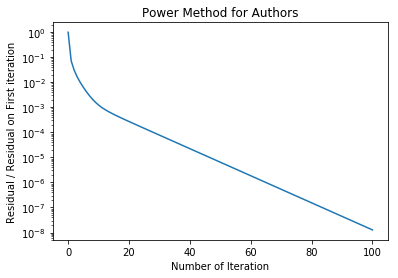

In [128]:
plt.semilogy(range(101), res_large/res_large[0])
plt.xlabel('Number of Iteration')
plt.ylabel('Residual / Residual on First iteration')
plt.title('Power Method for Authors');

In [143]:
popular = np.zeros((x_large.shape))
popular = x_large

In [144]:
print('The most important authors are: \n')
for i in range (10):
    top = popular.argmax()
    popular[top] = 0
    print(authors[top])

The most important authors are: 

Paul J. Besl
Alex Waibel
David Wagner
Oren Etzioni
Brad A. Myers
William J. Dally
Hiroshi Ishii
Thomas L. Madden
Jerome H. Saltzer
Kurt Hornik


#### Different authors are considered as most cited and most important. But there are some problem with popular, and I don'tunderstand what is it.